In [1]:
import json
import numpy as np

from utils_tail_probs import softmax
from utils_tail_probs import compute_tail_index
from typing import Literal

In [2]:
def load_epoch_log_probs(steps: int, split: Literal["train", "test"]):
    return json.load(
        open(
            f"../results/xsum_analysis/{split}/bart-base_data_xsum_checkpoint-{steps}_xsum_10_rows.json",
            "r",
        )
    )["beam_score_log_probs"]


def turn_log_prob_dict_into_np_array(
    dict_of_log_probs_by_beam_idx: dict[str, list[float]]
):
    log_probs_by_idx = np.array(
        [
            dict_of_log_probs_by_beam_idx[str(idx)]
            for idx in range(len(dict_of_log_probs_by_beam_idx.keys()))
        ]
    )
    log_probs_by_sample = log_probs_by_idx.T
    return log_probs_by_sample

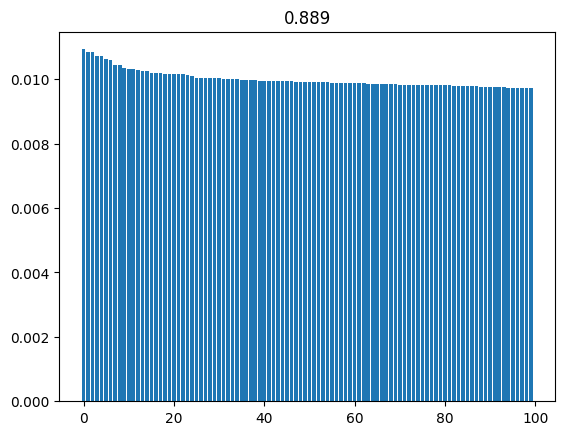

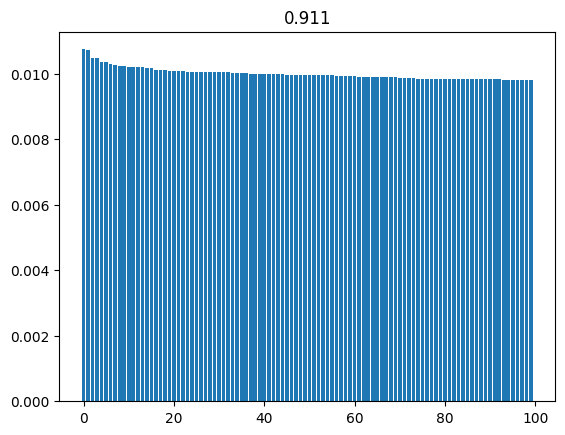

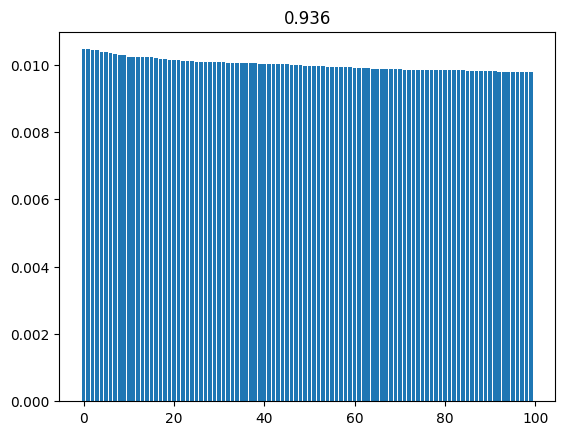

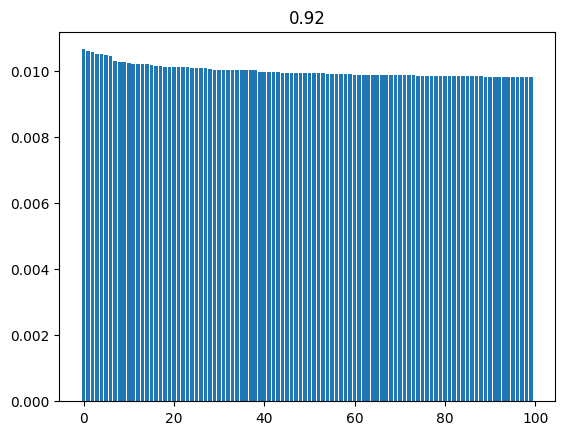

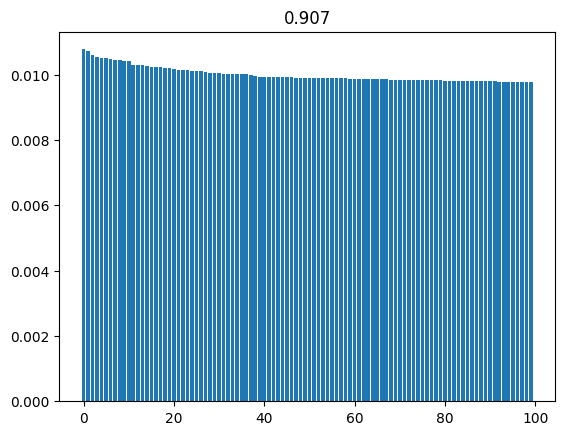

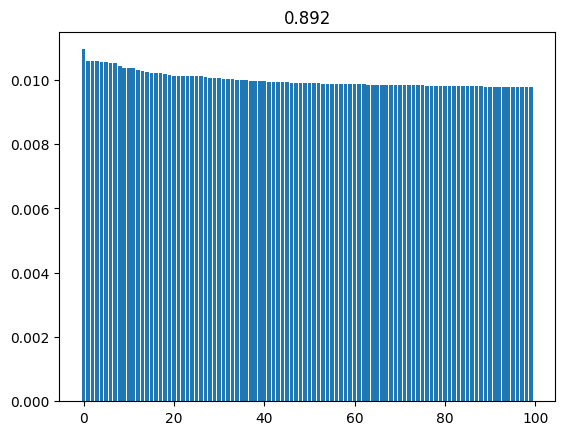

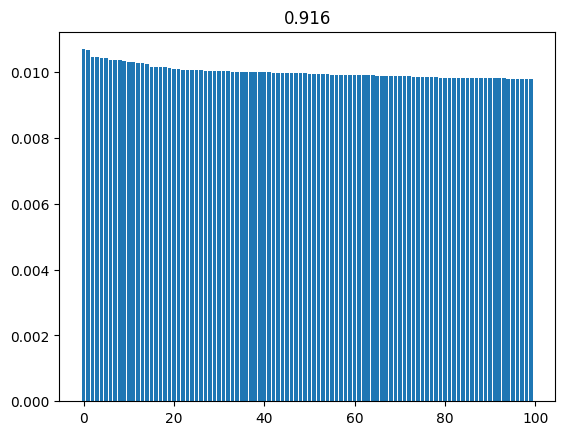

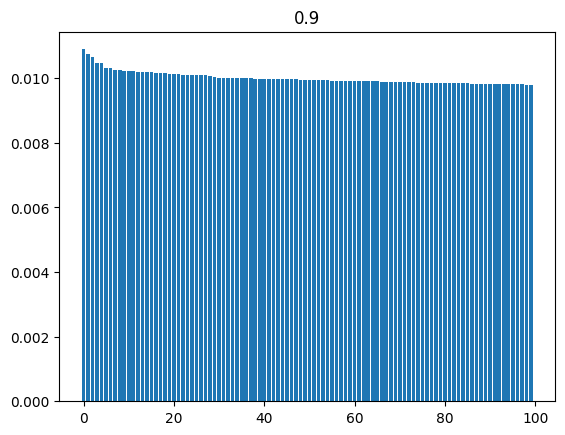

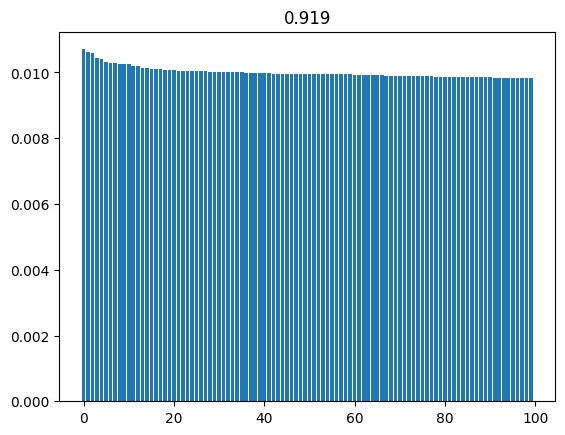

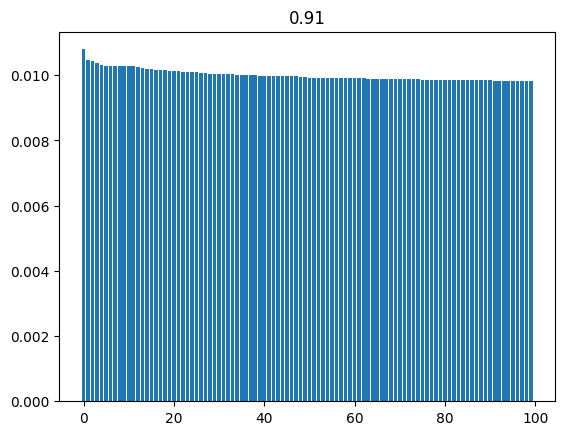

In [35]:
tail_index_mean_train, tail_index_std_train = list[float](), list[float]()
tail_index_mean_test, tail_index_std_test = list[float](), list[float]()

for i in range(50, 501, 50):
    log_probs_train = turn_log_prob_dict_into_np_array(load_epoch_log_probs(i, "train"))
    log_probs_test = turn_log_prob_dict_into_np_array(load_epoch_log_probs(i, "test"))

    tail_indices_train = compute_tail_index(log_probs_train)
    tail_indices_test = compute_tail_index(log_probs_test)

    tail_index_mean_train.append(float(np.mean(tail_indices_train)))
    tail_index_std_train.append(float(np.std(tail_indices_train)))
    tail_index_mean_test.append(float(np.mean(tail_indices_test)))
    tail_index_std_test.append(float(np.std(tail_indices_test)))

    probs = softmax(log_probs_test[1])
    plt.bar(x=range(len(probs)), height=probs)
    plt.title(round(probs[-1] / probs[0], 3))
    plt.show()

<BarContainer object of 100 artists>

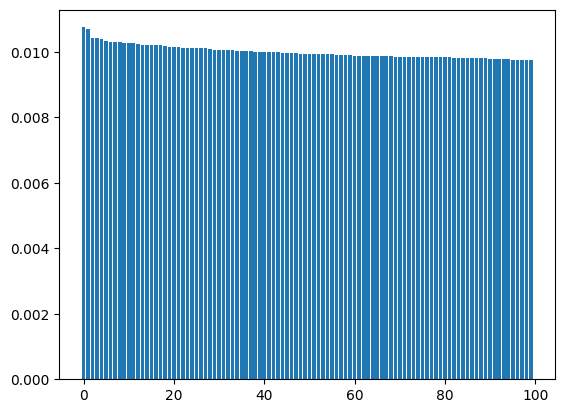

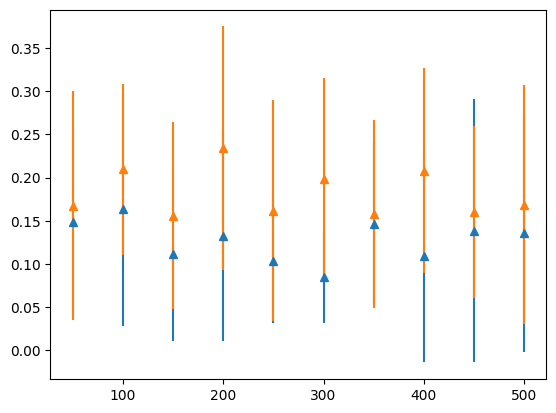

In [13]:
import matplotlib.pyplot as plt

plt.errorbar(
    list(range(50, 501, 50)),
    tail_index_mean_train,
    tail_index_std_train,
    linestyle="None",
    marker="^",
)

plt.errorbar(
    list(range(50, 501, 50)),
    tail_index_mean_test,
    tail_index_std_test,
    linestyle="None",
    marker="^",
)

plt.show()